In [304]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from collections import Counter
import os

import utils.label_explorer_utils as LE

In [305]:
# label_vector: [ trial_num, start, stop, *kwargs]
# kwargs: n_f_fr_s_st , num_reach, hand_reach, t_nt, hand_switch, approx_frames
#kwargs: n_f_fr_s_st: Trial type (null, failed, failed_rew,s ,succ_tug), label key [0, 1, 2, 3, 4] 
# kwargs: num_reach: int (3, 4 , 5 etc). Include all reaches up until handle has been retracted into rewzone (no post-reward reaches), label key [n_reaches]
# kwargs: hand_reach: l, r, bi This is the dominant hand of reaching. If multiple hands are used, take the hand used most often and indicate w/ hand switch ['l', 'r', 'bi'], 0 if null
# kwargs: t_nt: tug or no tug? Does the rat let the handle go until the robot has completely gone to the new reward position? ['tug' or 'no_tug']
# kwargs: hand_switch: Does the rat reach with more than one hand in a trial? [0 (no), 1 (yes)]
# kwargs*: approx_frames: approx how many frames did you take from this trial to label?
# kwargs: interrupted [0,1] 0 is normal (trial captures entire reach) 1 is interrupted (trial captures only part of behavior)

In [306]:
# Create folder in CWD to save data and plots #
current_directory = os.getcwd()
folder_name = 'Plots'
final_directory = os.path.join(current_directory, folder_name)
if not os.path.exists(final_directory):
    os.makedirs(final_directory)

# 0) Labels to CSV

## Define Labels

In [307]:
###############################
# DLC Video Labels
###############################

rm16_9_17_s1_label = [
    [1, 0, 0, 1, 1, 'l', 'Tug', 0, 0],  # single left rew tug
    [2, 0, 0, 1, 1, 'l', 'Tug', 0, 0],  # single left rew tug
    [3, 0, 0, 1, 1, 'rla', 'noTug', 0, 0],  # rl assist, 1 , notug, rew
    [4, 0, 0, 1, 1, 'l', 'noTug', 0, 0],  # l single rew notug
    [5, 0, 0, 1, 2, 'l', 'noTug', 0, 0],  # l 2 rew no tug
    [6, 0, 0, 1, 2, 'lra', 'Tug', 0, 0],  # lra 2 rew tug
    [7, 0, 0, 1, 4, 'lra', 'noTug', 0, 0],  # lra 4 rew notug
    [8, 0, 0, 1, 1, 'lra', 'noTug', 0, 0],  # lra 1 rew notug
    [9, 0, 0, 1, 1, 'l', 'Tug', 0, 0],  # l 1 rew tug
    [10, 0, 0, 1, 1, 'l', 'Tug', 0, 0],  # l 1 rew tug
    [11, 0, 0, 1, 1, 'lra', 'Tug', 0, 0],  # lra 2 rew tug
    [12, 0, 0, 1, 3, 'lra', 'Tug', 0, 0],  # lra 3 rew tug
    [13, 0, 0, 1, 3, 'lra', 'Tug', 0, 0],  # lra 3 rew tug
    [14, 0, 0, 1, 1, 'bi', 'Tug', 0, 0],  # bi 1 rew tug
    [15, 0, 0, 1, 1, 'l', 'Tug', 0, 0],  # l 1 rew tug
    [16, 0, 0, 1, 1, 'l', 'Tug', 0, 0],  # l 1 rew tug
    [17, 0, 0, 1, 1, 'lra', 'Tug', 0, 0],  # lra 1 rew tug
    [19, 0, 0, 1, 2, 'bi', 'Tug', 0, 0],  # bi 2 rew tug
    [20, 0, 0, 1, 1, 'l', 'Tug', 0, 0],  # l 1 r t
    [21, 0, 0, 1, 1, 'bi', 'Tug', 0, 0],  # bi 1 r t
    [22, 0, 0, 1, 1, 'l', 'Tug', 0, 0],  # l 1 r t
    [23, 0, 0, 1, 1, 'lra', 'Tug', 0, 0],  # lra 1 r t
    [24, 0, 0, 1, 1, 'l', 'Tug', 0, 0],  # l 1 r t
    [25, 0, 0, 1, 1, 'lra', 'Tug', 0, 0],  # lr 1 r t
    [26, 0, 0, 1, 1, 'l', 'Tug', 0, 0],  # l 1 r t
    [18, 0, 0, 1, 1, 'lra', 'Tug', 0, 0],  # lr 1 r t
    [0, 0, 0, 1, 2, 'rla', 'Tug', 1, 0]  # rl 2 r t hand switch

]

# RM16, 9-18, S1
# l18
rm16_9_18_s1_label = [
    [1, 0, 0, 1, 1, 'l', 'noTug', 0, 0],  # l 1 rew notug
    [2, 0, 0, 1, 3, 'l', 'noTug', 0, 0],  # l 3 rew notug
    [4, 0, 0, 1, 3, 'lr', 'noTug', 1, 0],  # lr 3 switching rew notug
    [5, 0, 0, 1, 1, 'l', 'noTug', 0, 0],  # l 1 rew no tug
    [6, 0, 0, 1, 1, 'l', 'noTug', 0, 0],  # l 1 rew no tug
    [7, 0, 0, 1, 2, 'lra', 'noTug', 0, 0],  # lr 2 rew notug
    [9, 0, 0, 1, 1, 'l', 'noTug', 0, 0],  # l 1 rew notug (check b4)
    [10, 0, 0, 1, 1, 'lra', 'noTug', 0, 0],  # lr 1 rew notug
    [12, 0, 0, 1, 1, 'lr', 'noTug', 0, 0],  # lr 1 rew notug
    [14, 0, 0, 1, 1, 'lr', 'Tug', 0, 0],  # lr 1 rew tug
    [15, 0, 0, 1, 1, 'l', 'noTug', 0, 0],  # l 1 rew notug
    [17, 0, 0, 1, 1, 'lra', 'noTug', 0, 0],  # lr 1 rew notug
    [0, 0, 0, 1, 4, 'l', 'noTug', 0, 0],  # l 4 norew notug
    [3, 0, 0, 1, 4, 'lra', 'noTug', 1, 0],  # lr 4 switching norew notug
    [8, 0, 0, 1, 11, 'lra', 'noTug', 1, 0],  # lr 11 switching norew notug
    [11, 0, 0, 1, 7, 'l', 'noTug', 0, 0],  # l 7 norew notug
    [13, 0, 0, 1, 7, 'l', 'noTug', 0, 0],  # l 7 norew notug
    [16, 0, 0, 1, 2, 'l', 'noTug', 0, 0],  # l 2 norew notug
    [18, 0, 0, 1, 6, 'l', 'noTug', 0, 0]
]

# RM16, 9-17, S2
# nl2
rm16_9_17_s2_label = [
    [1, 0, 0, 1, 1, 'l', 'noTug', 0, 0],  # l 1 rew notug
    [2, 0, 0, 1, 1, 'lra', 'Tug', 0, 0],  # lr 1 rew tug
    [3, 0, 0, 1, 2, 'lra', 'Tug', 0, 0],  # lr 2 rew tug
    [4, 0, 0, 1, 1, 'lra', 'Tug', 0, 0],  # lr 1 rew tug
    [5, 0, 0, 1, 1, 'lra', 'Tug', 0, 0],  # lr 1 rew tug
    [6, 0, 0, 1, 2, 'lra', 'Tug', 0, 0],  # lr 2 rew tug
    [7, 0, 0, 1, 1, 'lra', 'Tug', 0, 0],  # lr 1 rew tug
    [8, 0, 0, 1, 2, 'l', 'Tug', 0, 0],  # l 2 rew tug
    [9, 0, 0, 1, 3, 'l', 'Tug', 0, 0],  # l 3 rew tug
    [10, 0, 0, 1, 2, 'l', 'noTug', 0, 0],  # l 2 rew nt
    [11, 0, 0, 1, 2, 'l', 'noTug', 0, 0],  # l 2 rew nt
    [12, 0, 0, 1, 2, 'lra', 'noTug', 0, 0],  # lr 2 rew nt
    [13, 0, 0, 1, 2, 'lra', 'noTug', 0, 0],  # lr 2 rew nt
    [14, 0, 0, 1, 1, 'l', 'Tug', 0, 0],  # l 1 rew t
    [15, 0, 0, 1, 1, 'l', 'Tug', 0, 0],  # l 1 rew t
    [16, 0, 0, 1, 1, 'lra', 'noTug', 0, 0],  # lr 1 rew nt
    [17, 0, 0, 1, 1, 'l', 'noTug', 0, 0],  # l 1 rew nt
    [18, 0, 0, 1, 2, 'l', 'noTug', 0, 0],  # l 2 rew nt
    [19, 0, 0, 1, 1, 'l', 'Tug', 0, 0],  # l 1 rew t
    [20, 0, 0, 1, 2, 'l', 'noTug', 0, 0],  # l 2 rew nt
    [21, 0, 0, 1, 1, 'lra', 'Tug', 0, 0],  # lr 1 rew t
    [22, 0, 0, 1, 1, 'lra', 'Tug', 0, 0],  # lr 1 rew t
    [23, 0, 0, 1, 1, 'l', 'Tug', 0, 0],  # l 1 rew t
    [24, 0, 0, 1, 1, 'l', 'Tug', 0, 0],  # l 1 rew t
    [25, 0, 0, 1, 1, 'l', 'Tug', 0, 0],  # l 1 rew t
    [26, 0, 0, 1, 1, 'l', 'Tug', 0, 0],  # l 1 rew t
    [27, 0, 0, 1, 1, 'l', 'Tug', 0, 0],  # lr 1 rew t
    [28, 0, 0, 1, 6, 'lra', 'noTug', 1, 0],  # lr 6 handswitch rew nt
    [30, 0, 0, 1, 15, 'lra', 'Tug', 0, 0],  # lr 15 rew t
    [31, 0, 0, 1, 1, 'l', 'Tug', 0, 0],  # l 1 rew t
    [32, 0, 0, 1, 1, 'l', 'noTug', 0, 0],  # l 1 rew nt
    [33, 0, 0, 1, 1, 'lra', 'noTug', 0, 0],  # lr 1 rew nt
    [34, 0, 0, 1, 3, 'l', 'Tug', 0, 0],  # l 3 rew t
    [35, 0, 0, 1, 1, 'l', 'Tug', 0, 0],  # l 1 rew t
    [36, 0, 0, 1, 3, 'l', 'Tug', 0, 0],  # l 3 rew t
    [0, 0, 0, 1, 1, 'lra', 'Tug', 0, 0],  # lr 1 rew t
    [29, 0, 0, 1, 3, 'l', 'noTug', 0, 0],  # l 3 nr nt
    [37, 0, 0, 1, 1, 'l', 'Tug', 0, 0],  # l 1 r t
]

# RM16, DATE 9-20, S3
# blist1
rm16_9_20_s3_label = [
    [1, 1, 1, 4, 1, 'l', 'Tug', 0, 0]  # succ tugg, left hand, single reach,
    , [2, 1, 1, 3, 1, 'l', 'noTug', 0, 0]  # left handed reach, no tug of war, 1 reach, no switch,
    , [3, 1, 1, 3, 2, 'bi', 0, 1, 0]
    , [4, 1, 1, 4, 1, 'l', 'Tug', 0, 0]  # tries to grab handle when moving
    , [6, 1, 1, 3, 1, 'l', 'Tug', 0, 0]  # reaching after handle moves but can't grasp
    , [7, 1, 1, 2, 2, 'l', 0, 0, 0]  # A mis-label!!
    , [8, 1, 1, 3, 1, 'l', 'noTug', 0, 0]
    , [10, 1, 1, 3, 2, 'l', 'Tug', 0, 0]
    , [17, 1, 1, 4, 1, 'l', 'Tug', 0, 0]  #
    , [18, 1, 1, 3, 2, 'lbi', 'noTug', 1, 0]  # added lbi for multiple reaching arms
    , [19, 1, 1, 3, 2, 'lbi', 'noTug', 1, 0]  # lbi
    , [20, 1, 1, 4, 3, 'l', 'Tug', 0, 0]
    , [21, 1, 1, 4, 2, 'lbi', 'Tug', 0, 0]
    , [22, 1, 1, 3, 1, 'l', 'noTug', 0, 0]
    , [23, 1, 1, 3, 1, 'l', 'noTug', 0, 0]
    , [24, 1, 1, 3, 2, 'lbi', 'noTug', 0, 0]
    , [25, 1, 1, 2, 4, 'l', 0, 0, 0]
    , [26, 1, 1, 3, 3, 'lbi', 'noTug', 1, 0]
    , [27, 1, 1, 4, 1, 'lbi', 'Tug', 0, 0]
    , [28, 1, 1, 3, 2, 'l', 'noTug', 0, 0]
    , [30, 1, 1, 3, 2, 'l', 'noTug', 0, 0]
    , [31, 1, 1, 3, 2, 'lbi', 'noTug', 0, 0]
    , [32, 1, 1, 2, 4, 'l', 0, 0, 0]
    , [33, 1, 1, 4, 2, 'lr', 'noTug', 1, 0]
    , [34, 1, 1, 3, 1, 'lbi', 'noTug', 0, 0]
    , [35, 1, 1, 3, 1, 'l', 'noTug', 0, 0]
    , [37, 1, 1, 4, 1, 'lbi', 'Tug', 0, 0]
    , [38, 1, 1, 3, 2, 'lbi', 'noTug', 0, 0]
    , [39, 1, 1, 3, 3, 'l', 'noTug', 0, 0]
    , [40, 1, 1, 3, 1, 'l', 'noTug', 0, 0]
    , [43, 1, 1, 3, 1, 'bi', 'noTug', 0, 0]
    , [44, 1, 1, 4, 2, 'lbi', 'Tug', 0, 0]
    , [45, 1, 1, 3, 1, 'lbi', 'noTug', 0, 0]
    , [46, 1, 1, 3, 1, 'lbi', 'noTug', 0, 0]
    , [47, 1, 1, 3, 1, 'lbi', 'noTug', 0, 0]
    , [48, 1, 1, 3, 2, 'lbi', 'Tug', 0, 0]
    , [0, 1, 1, 0, 0, 0, 0, 0, 0]
    , [5, 1, 1, 2, 4, 'lr', 0, 0, 0]
    , [9, 1, 1, 1, 3, 'l', 0, 0, 0]
    , [11, 1, 1, 1, 1, 'l', 0, 0, 0]
    , [12, 1, 1, 1, 1, 'l', 0, 0, 0]
    , [13, 1, 1, 1, 1, 'l', 0, 0, 0]
    , [14, 1, 1, 1, 1, 'l', 0, 0, 0]
    , [15, 1, 1, 1, 1, 'l', 0, 0, 0]
    , [16, 1, 1, 0, 0, 0, 0, 0, 0]
    , [29, 1, 1, 1, 4, 'l', 0, 0, 0]
    , [36, 1, 1, 1, 9, 'llr', 'Tug', 1, 0]  # lots of stuff going on here
    , [41, 1, 1, 1, 6, 'l', 0, 0, 0]
    , [42, 1, 1, 1, 8, 'llr', 'Tug', 1, 0]
    , [49, 1, 1, 2, 4, 'lr', 0, 0, 0]]

# RM16, 09-19-2019, S3
# elist
rm16_9_19_s3_label = [
    [0, 1723, 2284, 0, 0, 0, 'no_tug', 0, 30]  # null
    , [1, 5593, 6156, 0, 0, 0, 'no_tug', 0, 27]  # null
    , [2, 7866, 8441, 3, 2, 'l', 'no_tug', 0, 14]  # success
    , [3, 8873, 9426, 1, 7, 'l', 'no_tug', 0, 20]  # failed
    , [4, 10101, 10665, 1, 3, 'l', 'no_tug', 0, 15]  # failed
    , [5, 12962, 13524, 1, 8, 'l', 'no_tug', 0, 27]  # failed

    , [6, 14760, 15351, 3, 2, 'bi', 'no_tug', 1, 25]  # success ## bi # starts mid reach
    , [7, 15802, 16431, 3, 3, 'bi', 'no_tug', 1, 30]  # success ## bi # starts mid reach # post reaching activity
    , [8, 17400, 17964, 1, 3, 'l', 'no_tug', 0, 13]  # failed # starts mid reach
    , [9, 18923, 19485, 3, 4, 'l', 'no_tug', 0, 19]  # success
    , [10, 20044, 20604, 1, 5, 'l', 'no_tug', 0, 6]  # failed
    , [11, 24406, 24969, 1, 1, 'l', 'no_tug', 0, 6]  # failed # ends mid reach
    , [12, 26962, 27521, 3, 1, 'l', 'no_tug', 0, 5]  # success # starts mid reach
    , [13, 27980, 28536, 1, 12, 'l', 'no_tug', 0, 18]  # failed # ends mid reach # lots of reaches
    , [14, 29034, 29596, 3, 6, 'bi', 'no_tug', 1, 13]  # success ## bi
    , [15, 30106, 30665, 3, 1, 'l', 'no_tug', 0, 8]  # success # starts mid reach
    , [16, 38998, 39591, 1, 2, 'l', 'no_tug', 0, 4]  # failed
    , [17, 40033, 40594, 0, 0, 0, 'no_tug', 0, 32]  # null
    , [18, 45355, 45914, 3, 7, 'l', 'no_tug', 0, 6]  # success
    , [19, 46845, 47405, 3, 1, 'l', 'no_tug', 0, 7]  # success

    , [20, 50359, 50949, 3, 1, 'l', 'no_tug', 1, 8]  # success # post reaching activity with r
    , [21, 58229, 58793, 3, 2, 'l', 'tug', 1, 12]
    # success # post reaching activity with r # rat lets handle go before in reward zone
    , [22, 59596, 60427, 3, 2, 'l', 'no_tug', 0, 9]  # success
    , [23, 60903, 61466, 3, 1, 'l', 'no_tug', 0, 4]  # success
    , [24, 62233, 62790, 3, 2, 'l', 'tug', 0, 10]  # success # rat lets handle go before in reward zone
    , [25, 66026, 66600, 1, 9, 'l', 'no_tug', 0, 27]
    # classifed as success in py notebook, but is failed trial # ends mid reach
    , [26, 67473, 68046, 3, 1, 'l', 'no_tug', 1, 7]  # success # post reaching activity with r
    , [27, 68689, 69260, 3, 2, 'bi', 'no_tug', 1, 9]  # success # bi
    , [28, 70046, 70617, 3, 2, 'bi', 'no_tug', 1, 5]  # success # bi # starts mid reach

    , [29, 71050, 71622, 3, 11, 'bi', 'tug', 1, 7]
    # success # bi # starts mid reach # rat lets handle go before in reward zone # lots of reaches
    , [30, 72914, 73501, 3, 1, 'l', 'no_tug', 0, 10]  # success
    , [31, 74777, 75368, 3, 3, 'bi', 'no_tug', 1, 9]  # success # bi # post reaching activity with r
    , [32, 81538, 82106, 3, 9, 'l', 'no_tug', 1, 13]  # success # post reaching activity with r
    , [33, 82534, 83114, 3, 4, 'bi', 'tug', 1, 12]
    # success ## bi # starts mid reach # rat lets handle go before in reward zone # includes uncommon failed bi reach
    , [34, 83546, 84118, 3, 2, 'l', 'no_tug', 1, 4]  # success # starts mid reach # post reaching activity with r
    , [35, 85563, 86134, 3, 2, 'l', 'no_tug', 1, 5]  # success # starts mid reach # post reaching activity with r
    , [36, 86564, 87134, 1, 13, 'l', 'no_tug', 0, 5]  # fail # lots of reaches
    , [37, 87574, 88173, 3, 7, 'l', 'no_tug', 1, 8]  # success # post reaching activity with r
    , [38, 89012, 89584, 3, 4, 'bi', 'tug', 1, 5]
    # success ## bi # rat lets handle go before in reward zone # includes uncommon reach with r first then left in bi reach

    , [39, 90738, 91390, 3, 7, 'l', 'no_tug', 1, 9]  # success # post reaching activity with r
    , [40, 91818, 92387, 1, 7, 'l', 'no_tug', 0, 6]]  # fail # starts mid reach

# RM15, 25, S3
# blist2
rm15_9_25_s3_label = [
    [3, 1, 1, 3, 1, 'r', 'noTug', 0, 0, 16360, 16400],
    [2, 1, 1, 3, 1, 'r', 'noTug', 0, 0, 15375, 15470],
    [4, 1, 1, 3, 1, 'r', 'Tug', 0, 0, 20555, 20600],
    [5, 1, 1, 3, 1, 'l', 'noTug', 0, 0, 23930, 24000],
    [6, 1, 1, 3, 1, 'r', 'Tug', 0, 0, 27145, 27205],
    [8, 1, 1, 3, 1, 'r', 'Tug', 0, 0, 32215, 32300],
    [9, 1, 1, 0, 0, 0, 0, 0, 0],
    [10, 1, 1, 3, 1, 'r', 'Tug', 0, 0, 34415, 34495],
    [11, 1, 1, 2, 3, 'r', 'noTug', 0, 0, 35300, 35333, 36365, 35330, 35360, 35405],
    [14, 1, 1, 3, 1, 'r', 'noTug', 0, 0, 72470, 72505],
    [16, 1, 1, 3, 1, 'r', 'noTug', 0, 0, 75000, 75090],
    [17, 1, 1, 3, 1, 'r', 'noTug', 0, 0, 86570, 86610],
    [0, 1, 1, 0, 0, 0, 0, 0, 0],  # null
    [1, 1, 1, 0, 0, 0, 0, 0, 0],  # null
    [7, 1, 1, 0, 0, 0, 0, 0, 0],  # null
    [12, 1, 1, 0, 0, 0, 0, 0, 0],  # null
    [13, 1, 1, 0, 0, 0, 0, 0, 0],  # null
    [15, 1, 1, 0, 0, 0, 0, 0, 0],  # null rear
    [18, 1, 1, 2, 1, 'r', 'Tug', 0, 0, 87495, 87555]]

# RM15, 17, S4
# blist3
rm15_9_17_s4_label = [
    [0, 1, 1, 3, 1, 'lbi', 'tug', 0, 0, 9470, 9610],
    [1, 1, 1, 3, 2, 'lbi', 'noTug', 1, 0, 10605, 10880, 10675, 10940],
    [2, 1, 1, 3, 2, 'lbi', 'noTug', 1, 0, 11630, 11675, 11676, 11720],
    [3, 1, 1, 3, 3, 'lbi', 'noTug', 0, 0, 12770, 13035, 13090, 13165, 12830, 13085, 13155, 13185],
    [4, 1, 1, 3, 1, 'l', 'noTug', 0, 0, 14635, 14700],
    [5, 1, 1, 3, 3, 'lbi', 'Tug', 0, 0, 19105, 19125, 19200, 19120, 19185, 19280],
    [6, 1, 1, 3, 3, 'lbi', 'noTug', 0, 0, 20730, 20763, 20845, 20762, 20830, 20915],
    [7, 1, 1, 3, 2, 'lbi', 'Tug', 0, 0, 21930, 21985, 21980, 22040]]

# 2019-09-20-S1-RM14_cam2
rm14_9_20_s1_label = [
    [0, 1358, 1921, 0, 0, 0, 'no_tug', 0, 0],  # null
    [1, 3092, 3679, 3, 1, 'r', 'no_tug', 0, 0],  # success
    [2, 4104, 4668, 1, 1, 'r', 'no_tug', 0, 0],  # failed
    [3, 5418, 5919, 3, 1, 'l', 'no_tug', 0, 0],  # success
    [4, 7127, 7584, 3, 1, 'l', 'no_tug', 0, 0],  # success
    [5, 12048, 12544, 3, 2, 'bi', 'no_tug', 1, 0],  # success, bi
    [6, 13145, 13703, 1, 4, 'r', 'no_tug', 1, 0],  # failed, reach 2 l, 2 r
    [7, 14120, 14609, 3, 1, 'l', 'no_tug', 0, 0],  # success, interupted
    [8, 16153, 16726, 3, 4, 'lra', 'no_tug', 1, 0],  # success, lra
    [9, 17276, 17838, 0, 0, 0, 'no_tug', 0, 0],  # null
    [10, 18557, 19083, 3, 2, 'bi', 'no_tug', 1, 0],  # success, bi
    [11, 19543, 20104, 1, 4, 'r', 'no_tug', 1, 0],  # failed, reach 2 l, 2 r
    [12, 25112, 25756, 3, 3, 'bi', 'no_tug', 1, 0],  # success, bi
    [13, 26288, 26847, 1, 4, 'r', 'no_tug', 0, 0],  # failed, reach 2 l, 2 r
    [14, 30104, 30667, 1, 1, 'l', 'no_tug', 0, 0],  # failed
    [15, 31876, 32426, 0, 0, 0, 'no_tug', 0, 0],  # null
    [16, 33928, 34448, 3, 2, 'lra', 'no_tug', 1, 0],  # success, lra
    [17, 34880, 35461, 3, 2, 'lra', 'no_tug', 1, 0],  # success, lra
    [18, 36083, 36707, 3, 3, 'lra', 'no_tug', 1, 0],  # success, lra
    [19, 37190, 37781, 1, 3, 'l', 'no_tug', 0, 0],  # failed
    [20, 38580, 39172, 3, 2, 'l', 'no_tug', 1, 0],  # success
    [21, 42519, 43217, 3, 2, 'r', 'no_tug', 1, 0],  # success
    [22, 44318, 44887, 3, 6, 'rla', 'no_tug', 1, 0],  # success
    [23, 45311, 45784, 3, 1, 'l', 'no_tug', 0, 0],  # success
    [24, 46207, 46755, 3, 2, 'l', 'no_tug', 0, 0],  # success
    [25, 47341, 47885, 3, 1, 'l', 'no_tug', 0, 0],  # success
    [26, 48442, 49004, 3, 1, 'l', 'no_tug', 0, 0],  # success
    [27, 49425, 49987, 3, 1, 'l', 'no_tug', 0, 0],  # success, interrupted
    [28, 50410, 50970, 3, 6, 'r', 'no_tug', 1, 0],  # success, not quite in reward zone, but there's licking
    [29, 55926, 56488, 3, 1, 'r', 'no_tug', 0, 0],  # success
    [30, 56911, 57404, 3, 2, 'lra', 'no_tug', 1, 0],  # success, interrupted
    [31, 58700, 59261, 3, 5, 'r', 'no_tug', 1, 0],  # success, in reward zone, no licking
    [32, 59708, 60271, 1, 3, 'r', 'no_tug', 1, 0],  # failed
    [33, 68042, 68618, 1, 3, 'r', 'no_tug', 0, 0],  # failed
    [34, 69121, 69697, 3, 3, 'rla', 'no_tug', 1, 0],  # success
    [35, 70242, 70816, 3, 4, 'l', 'no_tug', 1, 0],  # success
    [36, 71549, 72109, 3, 1, 'l', 'no_tug', 0, 0],  # success
    [37, 72541, 73115, 3, 1, 'l', 'no_tug', 0, 0],  # success, interrupted
    [38, 75805, 76325, 3, 1, 'l', 'no_tug', 0, 0],  # success
    [39, 76756, 77326, 3, 4, 'lra', 'no_tug', 1, 0],  # success, interrupted
    [40, 78866, 79439, 3, 2, 'l', 'no_tug', 0, 0],  # success
    [41, 80692, 811893, 3, 2, 'l', 'no_tug', 1, 0],  # success
    [42, 82560, 83181, 3, 2, 'bi', 'no_tug', 1, 0],  # success, is bi reach
    [43, 83612, 84096, 3, 1, 'l', 'no_tug', 0, 0],  # success, interupted
    [44, 84527, 85046, 3, 1, 'l', 'no_tug', 0, 0],  # success, interupted
    [45, 85475, 85992, 3, 1, 'r', 'no_tug', 0, 0],  # success, interupted
    [46, 87271, 87844, 3, 2, 'bi', 'no_tug', 1, 0],  # success, is bi
    [47, 88275, 88849, 1, 4, 'r', 'no_tug', 1, 0],  # failed, interrupted
    [48, 90043, 90620, 3, 1, 'l', 'no_tug', 0, 0],  # success
    [49, 91675, 92251, 3, 2, 'l', 'no_tug', 0, 0]]  # success

# 2019-09-18-S2-RM14-cam2
rm14_9_18_s2_label = [
    [0, 3144, 3708, 0, 0, 0, 'no_tug', 0, 0],  # null
    [1, 6876, 7735, 3, 2, 'bi', 'no_tug', 1, 0],  # success, bi
    [2, 9931, 10499, 3, 2, 'bi', 'no_tug', 1, 0],  # success, bi
    [3, 12640, 13206, 1, 1, 'l', 'no_tug', 0, 0],  # failed
    [4, 13703, 14446, 3, 3, 'lra', 'no_tug', 1, 0],  # success, interrupted
    [5, 14895, 15445, 3, 3, 'bi', 'no_tug', 1, 0],  # success, bi
    [6, 15893, 16457, 0, 0, 0, 'no_tug', 0, 0],  # null
    [7, 16874, 17465, 1, 2, 'r', 'no_tug', 1, 0],  # failed, reach 1 r, 1 l
    [8, 21293, 21792, 3, 2, 'rla', 'no_tug', 1, 0],  # success
    [9, 22507, 23014, 3, 2, 'bi', 'no_tug', 1, 0],  # success, bi
    [10, 23638, 24203, 1, 2, 'l', 'no_tug', 0, 0],  # failed
    [11, 24730, 25296, 3, 1, 'r', 'no_tug', 0, 0],  # success, not quite in reward zone
    [12, 26751, 27319, 0, 0, 0, 'no_tug', 0, 0],  # null
    [13, 29469, 30040, 0, 0, 0, 'no_tug', 0, 0],  # null
    [14, 30505, 31091, 0, 0, 0, 'no_tug', 0, 0],  # null
    [15, 31689, 32276, 3, 1, 'l', 'no_tug', 0, 0],  # success
    [16, 35532, 36112, 1, 5, 'r', 'no_tug', 1, 0],  # failed
    [17, 36593, 37174, 0, 0, 0, 'no_tug', 0, 0],  # null
    [18, 38288, 38927, 3, 2, 'r', 'no_tug', 0, 0],  # success
    [19, 39478, 40047, 1, 2, 'l', 'no_tug', 0, 0],  # failed
    [20, 43806, 44379, 0, 0, 0, 'no_tug', 0, 0],  # null
    [21, 46307, 46888, 1, 1, 'r', 'no_tug', 0, 0],  # failed
    [22, 47932, 48511, 0, 0, 0, 'no_tug', 0, 0],  # null
    [23, 48947, 49591, 3, 2, 'bi', 'no_tug', 1, 0],  # success, bi
    [24, 54297, 54875, 1, 3, 'l', 'no_tug', 1, 0],  # failed
    [25, 55317, 55894, 0, 0, 0, 'no_tug', 0, 0],  # null
    [26, 68274, 69141, 3, 3, 'l', 'no_tug', 1, 0],  # success
    [27, 69617, 70207, 3, 2, 'r', 'no_tug', 0, 0],  # success
    [28, 72591, 73164, 3, 2, 'rla', 'no_tug', 1, 0],  # success
    [29, 73719, 74223, 3, 2, 'rla', 'no_tug', 1, 0],  # success
    [30, 79481, 80078, 3, 2, 'bi', 'no_tug', 1, 0],  # success
    [31, 80529, 81127, 0, 0, 0, 'no_tug', 0, 0],  # null
    [32, 83369, 83963, 1, 4, 'r', 'no_tug', 1, 0],  # failed, reach 2 l , 2 r
    [33, 84447, 85042, 1, 4, 'r', 'no_tug', 1, 0],  # failed, interrupted
    [34, 85491, 86088, 1, 3, 'r', 'no_tug', 0, 0],  # failed
    [35, 86539, 87139, 3, 5, 'bi', 'no_tug', 1, 0],  # success, interrupted bi
    [36, 88801, 89422, 3, 4, 'lra', 'no_tug', 1, 0],  # success, interrupted
    [37, 89877, 90689, 3, 3, 'l', 'no_tug', 1, 0],  # success
    [38, 91302, 91901, 3, 1, 'r', 'no_tug', 1, 0],  # success, interrupted
    [39, 96013, 96611, 1, 4, 'r', 'no_tug', 1, 0]]  # failed, reach 2 l , 2 r

# Guang's labels
# 2019-09-20-S3-RM13-cam2
rm13_9_20_s3_label = [
                      [0, 0, 0, 0, 0, 0, 0, 0, 0], # null
                      [1, 0, 0, 1, 2, 'l', 0, 0, 0], #failed
                      [2, 0, 0, 3, 1, 'r', 0, 0, 0], #success
                      [3, 0, 0, 0, 0, 0, 0, 0, 0], #null
                      [4, 0, 0, 3, 1, 'l', 0, 0, 0], #success
                      [5, 0, 0, 3, 1, 'r', 0, 0, 0], #success
                      [6, 0, 0, 3, 1, 'r', 0, 0, 0], #success
                      [7, 0, 0, 1, 4, 'l', 0, 0, 0], #failed
                      [8, 0, 0, 3, 1, 'r', 0, 0, 0], #success
                      [9, 0, 0, 3, 2, 'r', 0, 0, 0], #success
                      [10, 0, 0, 1, 2, 'l', 0, 0, 0], #failed
                      [11, 0, 0, 3, 1, 'r', 0, 0, 0], #success
                      [12, 0, 0, 3, 1, 'r', 0, 0, 0], #success
                      [13, 0, 0, 0, 0, 0, 0, 0, 0], # null
                      [14, 0, 0, 3, 1, 'r', 0, 0, 0], #success
                      [15, 0, 0, 3, 1, 'r', 0, 0, 0], #success
                      [16, 0, 0, 3, 1, 'l', 0, 0, 0], #success
                      [17, 0, 0, 3, 1, 'l', 0, 0, 0], #success #starts mid reach
                      [18, 0, 0, 3, 6, 'r', 0, 1, 0], #success #bi
                      [19, 0, 0, 1, 13, 'bi', 0, 1, 0], #failed #bi #lots of reaches
                      [20, 0, 0, 1, 5, 'l', 0, 0, 0], #failed
                      [21, 0, 0, 1, 3, 'l', 0, 0, 0], #failed
                      [22, 0, 0, 0, 0, 0, 0, 0, 0], # null
                      [23, 0, 0, 1, 2, 'r', 0, 0, 0], #failed
                      [24, 0, 0, 3, 2, 'r', 0, 0, 0], #success #starts mid reach
                      [25, 0, 0, 0, 0, 0, 0, 0, 0], # null
                      [26, 0, 0, 3, 1, 'r', 0, 0, 0], #success
                      [27, 0, 0, 0, 0, 0, 0, 0, 0], # null
                      [28, 0, 0, 3, 2, 'r', 0, 0, 0], #success #starts mid reach
                      [29, 0, 0, 1, 2, 'l', 0, 0, 0], #failed
                      [30, 0, 0, 3, 2, 'bi', 0, 1, 0], #success #bi
                      [31, 0, 0, 3, 6, 'r', 0, 1, 0], #success #bi
                      [32, 0, 0, 1, 4, 'l', 0, 0, 0], #failed
                      [33, 0 ,0, 3, 2, 'r', 0, 0, 0], #success #starts mid reach
                      [34, 0, 0, 3, 1, 'r', 0, 0, 0], #success
                      [35, 0, 0, 3, 1, 'r', 0, 0, 0], #success #starts mid reach
                      [36, 0, 0, 3, 1, 'r', 0, 0, 0], #success
                      [37, 0, 0, 3, 5, 'r', 0, 0, 0], #success #starts mid reach
                      [38, 0, 0, 0, 0, 0, 0, 0, 0], # null
                      [39, 0, 0, 1, 4, 'r', 0, 0, 0], #failed
                      [40, 0, 0, 3, 1, 'r', 0, 0, 0], #success
                      [41, 0, 0, 1, 3, 'l', 0, 0, 0], #failed
                      [42, 0, 0, 0, 0, 0, 0, 0, 0], # null
                      [43, 0, 0, 3, 1, 'r', 0, 0, 0], #success
                      [44, 0, 0, 3, 2, 'r', 0, 0, 0], #success
                      [45, 0, 0, 1, 6, 'r', 0, 1, 0], #failed #hand-swith at the last reach
                      [46, 0, 0, 3, 10, 'bi', 0, 1, 0], #success #starts mid reach #bi #lots of reaches
                      [47, 0, 0, 3, 1, 'r', 0, 0, 0], #success
                      [48, 0, 0, 3, 1, 'r', 0, 0, 0], #success
                      [49, 0, 0, 1, 7, 'l', 0, 0, 0], #failed with lots of reaches
                      [50, 0, 0, 3, 6, 'r', 0, 0, 0], #success
                      [51, 0, 0, 3, 1, 'r', 0, 0, 0], #success
                      [52, 0, 0, 3, 2, 'r', 0, 0, 0], #success
                      [53, 0, 0, 3, 1, 'r', 0, 0, 0], #success #starts mid reach
                      [54, 0, 0, 0, 0, 0, 0, 0, 0], # null
                      [55, 0, 0, 0, 0, 0, 0, 0, 0], # null
                      [56, 0, 0, 3, 3, 'r', 0, 0, 0], #success
                      ]

# 2019-09-18-S4-RM11-cam2
rm11_9_18_s4_label = [
    [0, 0, 0, 3, 1, 0, 'no_tug', 0, 0],  # success #mouth reach without hand
    [1, 0, 0, 3, 1, 0, 'no_tug', 0, 0],  # success #mouth reach without hand
    [2, 0, 0, 3, 1, 0, 'no_tug', 0, 0],  # success #mouth reach without hand
    [3, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [4, 0, 0, 3, 1, 0, 'no_tug', 0, 0],  # success #mouth reach without hand
    [5, 0, 0, 3, 1, 'r', 'no_tug', 0, 0],  # success
    [6, 0, 0, 3, 1, 0, 'no_tug', 0, 0],  # success #mouth reach without hand
    [7, 0, 0, 3, 1, 0, 'no_tug', 0, 0],  # success #mouth reach without hand
    [8, 0, 0, 3, 1, 0, 'no_tug', 0, 0],  # success #mouth reach without hand
    [9, 0, 0, 3, 1, 0, 'no_tug', 0, 0],  # success #mouth reach without hand
    [10, 0, 0, 3, 1, 'r', 'no_tug', 0, 0],  # success
    [11, 0, 0, 3, 1, 0, 'no_tug', 0, 0],  # success #mouth reach without hand
    [12, 0, 0, 3, 1, 'r', 'no_tug', 0, 0],  # success
    [13, 0, 0, 3, 1, 0, 'no_tug', 0, 0],  # success #mouth reach without hand
    [14, 0, 0, 3, 1, 0, 'no_tug', 0, 0],  # success #mouth reach without hand
    [15, 0, 0, 3, 1, 0, 'no_tug', 0, 0],  # success #mouth reach without hand
    [16, 0, 0, 3, 1, 'r', 'no_tug', 0, 0],  # success
    [17, 0, 0, 3, 1, 'r', 'no_tug', 0, 0],  # success #mouth reach #hand reach failed
    [18, 0, 0, 3, 1, 'r', 'no_tug', 0, 0],  # success #mouth reach #hand reach failed
    [19, 0, 0, 3, 1, 0, 'no_tug', 0, 0],  # success #mouth reach #starts mid reach
    [20, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [21, 0, 0, 3, 1, 'r', 'no_tug', 0, 0],  # success
    [22, 0, 0, 3, 1, 0, 'no_tug', 0, 0],  # success #mouth reach without hand
    [23, 0, 0, 3, 1, 0, 'no_tug', 0, 0],  # success #mouth reach #starts mid reach
    [24, 0, 0, 3, 1, 0, 'no_tug', 0, 0],  # success #mouth reach without hand
    [25, 0, 0, 3, 1, 0, 'no_tug', 0, 0],  # success #mouth reach without hand
    [26, 0, 0, 3, 2, 'r', 'no_tug', 0, 0],  # success
    [27, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [28, 0, 0, 0, 0, 0, 'no_tug', 0, 0]  # null
]

# 2019-09-19-S3-RM9-cam2
rm9_9_19_s3_label = [
    [0, 0, 0, 3, 1, 'l', 'no_tug', 0, 0],  # success
    [1, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [2, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [3, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [4, 0, 0, 3, 1, 'l', 'no_tug', 0, 0],  # success #starts mid reach
    [5, 0, 0, 3, 2, 'l', 'no_tug', 0, 0],  # success
    [6, 0, 0, 1, 1, 'l', 'no_tug', 0, 0],  # failed
    [7, 0, 0, 3, 1, 'l', 'no_tug', 0, 0],  # success #starts mid reach
    [8, 0, 0, 3, 1, 'l', 'no_tug', 0, 0],  # success
    [9, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [10, 0, 0, 3, 2, 'l', 'no_tug', 0, 0],  # success
    [11, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [12, 0, 0, 3, 1, 'l', 'no_tug', 0, 0],  # success
    [13, 0, 0, 3, 1, 'l', 'no_tug', 0, 0],  # success
    [14, 0, 0, 3, 2, 'bi', 'no_tug', 1, 0],  # success #bi
    [15, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [16, 0, 0, 3, 1, 'l', 'no_tug', 0, 0],  # success
    [17, 0, 0, 3, 1, 'l', 'no_tug', 0, 0],  # success
    [18, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [19, 0, 0, 3, 1, 'l', 'no_tug', 0, 0],  # success
    [20, 0, 0, 3, 1, 'bi', 'no_tug', 0, 0],  # success #bi #starts mid reach
    [21, 0, 0, 3, 2, 'bi', 'no_tug', 1, 0],  # success #bi
    [22, 0, 0, 3, 1, 'l', 'no_tug', 0, 0],  # success
    [23, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [24, 0, 0, 3, 1, 'l', 'no_tug', 0, 0],  # success
    [25, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [26, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [27, 0, 0, 3, 1, 'l', 'no_tug', 0, 0],  # success
    [28, 0, 0, 3, 1, 'r', 'no_tug', 0, 0],  # success
    [29, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [30, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [31, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [32, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [33, 0, 0, 3, 1, 'l', 'no_tug', 0, 0],  # success
    [34, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [35, 0, 0, 3, 1, 'l', 'no_tug', 0, 0],  # success
    [36, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [37, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [38, 0, 0, 3, 1, 'l', 'no_tug', 0, 0],  # success
    [39, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [40, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [41, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [42, 0, 0, 3, 2, 'l', 'no_tug', 0, 0],  # success
    [43, 0, 0, 3, 1, 'l', 'no_tug', 0, 0],  # success
    [44, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [45, 0, 0, 3, 2, 'l', 'no_tug', 0, 0],  # success #starts mid reach
    [46, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [47, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [48, 0, 0, 3, 1, 'l', 'no_tug', 0, 0],  # success
    [49, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [50, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
]

# 2019-09-17-S2-RM10-cam2
rm10_9_17_s2_label = [
    # [0, 0, 0, ] # can't open the file
    [1, 0, 0, 3, 1, 'l', 'no_tug', 0, 0],  # success
    [2, 0, 0, 3, 1, 'l', 'no_tug', 0, 0],  # success # starts mid reach
    [3, 0, 0, 3, 1, 'l', 'no_tug', 0, 0],  # success # starts mid reach
    [4, 0, 0, 3, 1, 'l', 'no_tug', 0, 0],  # success # starts mid reach
    [5, 0, 0, 3, 1, 'l', 'no_tug', 0, 0],  # success # starts mid reach
    [6, 0, 0, 3, 1, 'l', 'no_tug', 0, 0],  # success #
    [7, 0, 0, 3, 1, 'l', 'no_tug', 0, 0],  # success # starts mid reach
]

# 2019-09-19-S1-RM12-cam2
rm12_9_19_s1_label = [
    [0, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [1, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [2, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [3, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
    [4, 0, 0, 0, 0, 0, 'no_tug', 0, 0],  # null
]

In [308]:
# labels
# RM16_9_17_s1
# RM16, 9-18, S1
# RM16, 9-17, S2
# RM16, DATE 9-20, S3
# RM16, 09-19-2019, S3
# RM15, 25, S3
# RM15, 17, S4
# 2019-09-20-S1-RM14_cam2
# 2019-09-18-S2-RM14-cam2
# 2019-09-20-S3-RM13-cam2
# 2019-09-19-S1-RM12-cam2
# 2019-09-18-S4-RM11-cam2
# 2019-09-17-S2-RM10-cam2
# 2019-09-19-S3-RM9-cam2

labels = [[rm16_9_17_s1_label,
rm16_9_18_s1_label,
rm16_9_17_s2_label,
rm16_9_20_s3_label,
rm16_9_19_s3_label],

[rm15_9_25_s3_label,
rm15_9_17_s4_label],

[rm14_9_20_s1_label,
rm14_9_18_s2_label],

[rm13_9_20_s3_label],
[rm12_9_19_s1_label],
[rm11_9_18_s4_label],
[rm10_9_17_s2_label],
[rm9_9_19_s3_label]
]

block_paths = [
[['17', 'S1', 'RM16'],
['18', 'S1', 'RM16'],
['17', 'S2', 'RM16'],
['20', 'S3', 'RM16'],
['19', 'S3', 'RM16']],

[['25', 'S3', 'RM15'],
['17', 'S4', 'RM15']],

[['20', 'S1', 'RM14'],
['18', 'S2', 'RM14']],

[['20', 'S3', 'RM13']],
[['19', 'S1', 'RM12']],
[['18', 'S4', 'RM11']],
[['17', 'S2', 'RM10']],
[['19', 'S3', 'RM9']],
]

## Process each label

In [311]:
all_labels = []
for i in range(len(block_paths)):  # for each rat
    for j in range(len(block_paths[i])):  # for each block
        label = labels[i][j]
        block_IDs = block_paths[i][j] # date, session, rat as str
        
        vectorized_label, _ = LE.make_vectorized_labels(label)
        new_label = [np.append(temp, block_IDs) for temp in vectorized_label]
        all_labels.extend(new_label)

all_labels[0:5]

[array(['1.0', '0.0', '0.0', '1.0', '1.0', '1.0', '1.0', '0.0', '0.0',
        '17', 'S1', 'RM16'], dtype='<U32'),
 array(['2.0', '0.0', '0.0', '1.0', '1.0', '1.0', '1.0', '0.0', '0.0',
        '17', 'S1', 'RM16'], dtype='<U32'),
 array(['3.0', '0.0', '0.0', '1.0', '1.0', '1.0', '0.0', '0.0', '0.0',
        '17', 'S1', 'RM16'], dtype='<U32'),
 array(['4.0', '0.0', '0.0', '1.0', '1.0', '1.0', '0.0', '0.0', '0.0',
        '17', 'S1', 'RM16'], dtype='<U32'),
 array(['5.0', '0.0', '0.0', '1.0', '2.0', '1.0', '0.0', '0.0', '0.0',
        '17', 'S1', 'RM16'], dtype='<U32')]

## Save as CSV

In [312]:
#all_labels_df = LE.make_vectorized_labels_to_df(all_labels)
#filename = "DataFrames/NONBINARY_LABELS.csv"  # file with vectorized labels
#all_labels_df.to_csv(filename)

#print("Done!")

# One Hot

In [313]:
all_labels_df

,Trial,Start Frame,Stop Frame,Trial Type,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat
0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,17,S1,RM16
1,2.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,17,S1,RM16
2,3.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,17,S1,RM16
3,4.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,17,S1,RM16
4,5.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,17,S1,RM16
...,...,...,...,...,...,...,...,...,...,...,...,...
436,46.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,19,S3,RM9
437,47.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,19,S3,RM9
438,48.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,19,S3,RM9
439,49.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,19,S3,RM9


## One Hot

In [316]:
binary_df = LE.map_replace(all_labels_df,'Trial Type', LE.onehot_nulls )
binary_df = LE.map_replace(binary_df,'Num Reaches', LE.onehot_num_reaches)
binary_df = LE.map_replace(binary_df,'Which Hand', LE.hand_type_onehot)

# add nonbinary columns for num reaches and which hand
binary_df['Nonbin Num Reaches'] = all_labels_df["Num Reaches"].values.astype(float)
binary_df['Nonbin Which Hand'] = all_labels_df['Which Hand'].values.astype(float)

binary_df



,Trial,Start Frame,Stop Frame,Trial Type,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat,Nonbin Num Reaches,Nonbin Which Hand
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,S1,RM16,1.0,1.0
1,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,S1,RM16,1.0,1.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
4,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17,S1,RM16,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,46.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9,0.0,5.0
437,47.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9,0.0,5.0
438,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,1.0,1.0
439,49.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9,0.0,5.0


## Save as CSV

In [317]:
filename = "DataFrames\LABELS.csv"
binary_df.to_csv(filename) # csv with trial type, num reaches, and which hand as binary float fields and some nonbin fields.

print("Done!")

Done!


# Visualize

In [318]:
all_labels_df.describe()

,Trial,Start Frame,Stop Frame,Trial Type,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat
count,441,441,441,441,441,441,441,441,441,441,441,441
unique,57,133,133,5,15,4,2,2,19,5,4,8
top,1.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,20,S3,RM16
freq,14,233,233,217,190,201,287,358,400,157,218,175


In [319]:
binary_df.describe()

,Trial Type,Num Reaches,Which Hand,Nonbin Num Reaches,Nonbin Which Hand
count,441.000000,441.000000,441.000000,441.000000,441.000000
mean,0.156463,0.412698,0.544218,1.907029,2.718821
std,0.363706,0.492879,0.498607,2.114446,1.823542
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.000000,0.000000,1.000000,1.000000,2.000000
75%,0.000000,1.000000,1.000000,2.000000,5.000000
max,1.000000,1.000000,1.000000,15.000000,5.000000


## Visualize Class Balances

In [320]:
# define label arrays
str_binary_df = binary_df.copy()
trial_type = binary_df['Trial Type']
num_reaches = binary_df['Num Reaches']
which_hand = binary_df['Which Hand']

In [321]:
# convert to string value
str_trial_type = LE.inverse_transform_nulls(trial_type)
str_num_reaches = LE.inverse_transform_reaches(num_reaches)
str_which_hand = LE.inverse_transform_hand(which_hand)

### Display Counts

In [322]:
counter_trial = pd.DataFrame(str_trial_type).value_counts() 
counter_reaches = pd.DataFrame(str_num_reaches).value_counts() 
counter_hand = pd.DataFrame(str_which_hand).value_counts() 

print(counter_trial.to_string())
print(counter_reaches.to_string())
print(counter_hand.to_string())

not null    372
null         69
1 reach    259
2+         182
LRA,    240
R, L    201


### Display Bar Plots

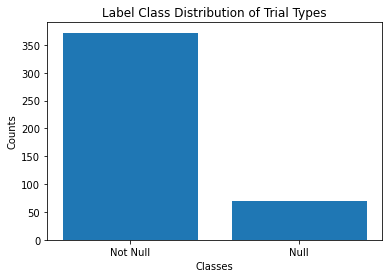

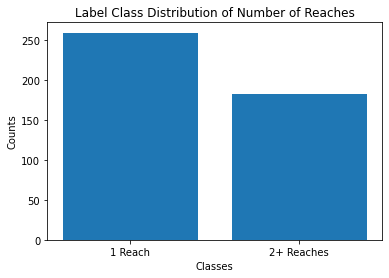

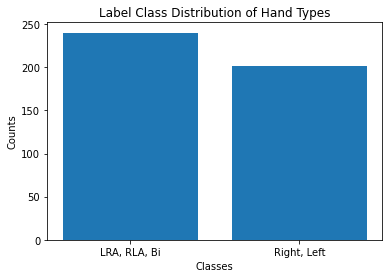

In [323]:
plt_trial = plt.figure()
plt.bar(['Not Null', 'Null'], counter_trial.values)
plt.title("Label Class Distribution of Trial Types")
plt.ylabel("Counts")
plt.xlabel("Classes")

plt_reaches = plt.figure()
plt.bar(['1 Reach', '2+ Reaches'], counter_reaches.values)
plt.title("Label Class Distribution of Number of Reaches")
plt.ylabel("Counts")
plt.xlabel("Classes")

plt_hand = plt.figure()
plt.bar(['LRA, RLA, Bi', 'Right, Left'], counter_hand.values)
plt.title("Label Class Distribution of Hand Types")
plt.ylabel("Counts")
plt.xlabel("Classes")

plt.show()

## Save Plots as PDF

In [325]:
# add figures to save 

figures = [plt_trial, plt_reaches, plt_hand]
filename = "Plots\label_class_balances.pdf"
LE.plt_to_pdf(figures, filename)

print("done!")

Figure(432x288)
Figure(432x288)
Figure(432x288)
done!


# End Notebook